In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('../data/ml_data/diabetes_data.csv')

print(diabetes_df.shape)
diabetes_df.head()

(70692, 18)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

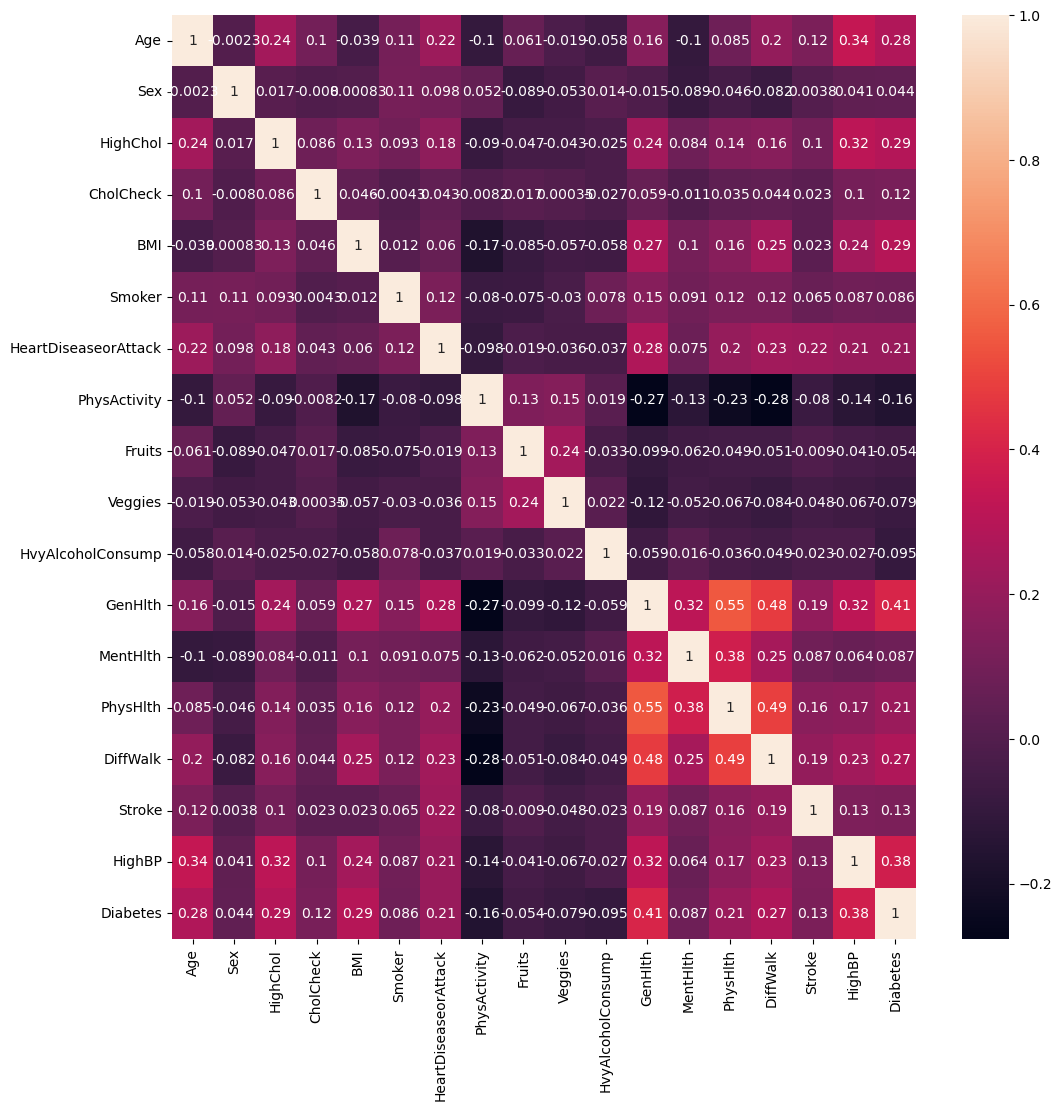

In [4]:
corrs = diabetes_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corrs, annot=True)
plt.show()

In [5]:
diabetes_df[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']].describe()

,Age,BMI,GenHlth,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,29.856985,2.837082,3.752037,5.810417
std,2.852153,7.113954,1.113565,8.155627,10.062261
min,1.000000,12.000000,1.000000,0.000000,0.000000
25%,7.000000,25.000000,2.000000,0.000000,0.000000
50%,9.000000,29.000000,3.000000,0.000000,0.000000
75%,11.000000,33.000000,4.000000,2.000000,6.000000
max,13.000000,98.000000,5.000000,30.000000,30.000000


<Axes: >

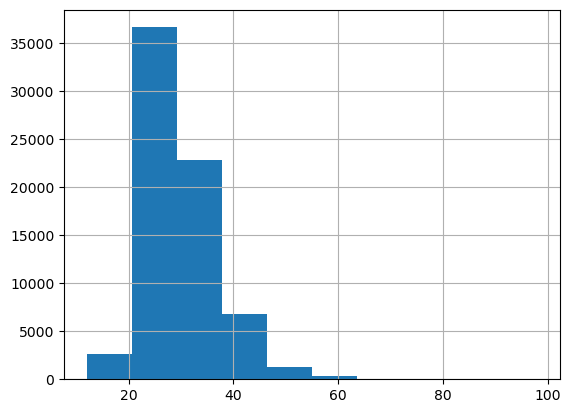

In [6]:
diabetes_df['BMI'].hist()

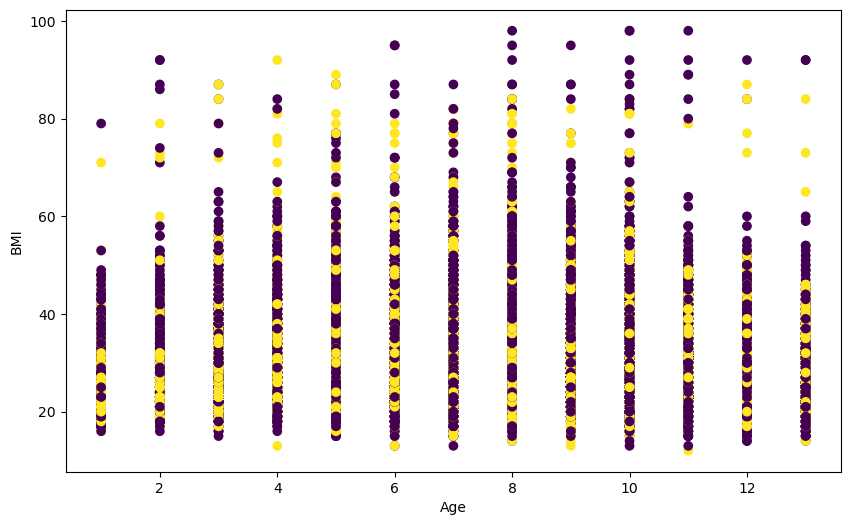

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(x=diabetes_df['Age'], y=diabetes_df['BMI'], c=diabetes_df['Sex'])

plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

In [8]:
diabetes_df['Age'].groupby(diabetes_df.Age).value_counts()

Age   Age 
1.0   1.0       979
2.0   2.0      1396
3.0   3.0      2049
4.0   4.0      2793
5.0   5.0      3520
6.0   6.0      4648
7.0   7.0      6872
8.0   8.0      8603
9.0   9.0     10112
10.0  10.0    10856
11.0  11.0     8044
12.0  12.0     5394
13.0  13.0     5426
Name: count, dtype: int64

In [9]:
diabetes_df['HvyAlcoholConsump'].loc[diabetes_df['HvyAlcoholConsump'] == 1].groupby(diabetes_df['Age']).value_counts()

Age   HvyAlcoholConsump
1.0   1.0                   82
2.0   1.0                   93
3.0   1.0                  125
4.0   1.0                  169
5.0   1.0                  194
6.0   1.0                  231
7.0   1.0                  355
8.0   1.0                  398
9.0   1.0                  404
10.0  1.0                  441
11.0  1.0                  271
12.0  1.0                  141
13.0  1.0                  116
Name: count, dtype: int64

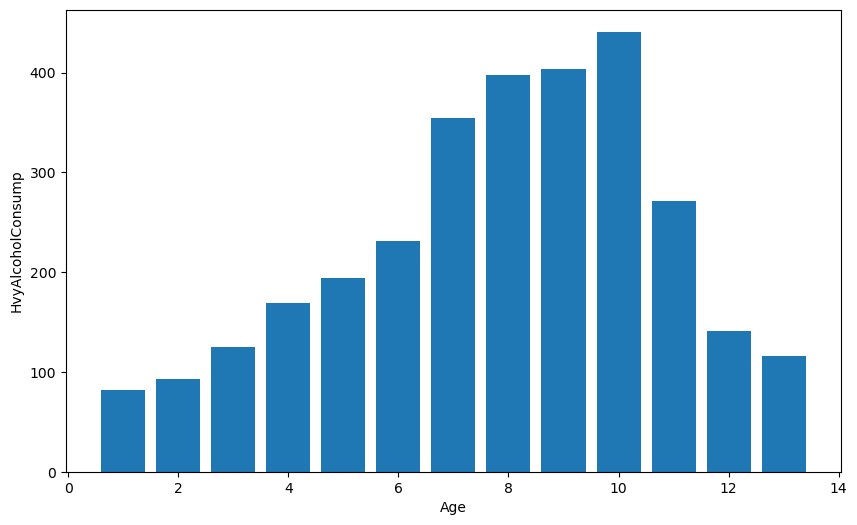

In [10]:
plt.figure(figsize=(10, 6))

ages = diabetes_df['Age'].groupby(diabetes_df.Age).value_counts().index
ages = [int(x[1]) for x in ages]
heavy_alcohol_consumption = diabetes_df['HvyAlcoholConsump'].loc[diabetes_df['HvyAlcoholConsump'] == 1].groupby(diabetes_df['Age']).value_counts().values


plt.bar(ages, heavy_alcohol_consumption)
plt.xlabel('Age')
plt.ylabel('HvyAlcoholConsump')

plt.show()

In [11]:
diabetes_df['Diabetes'].value_counts()

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

In [12]:
diabetes_df['Stroke'].value_counts()

Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

In [13]:
diabetes_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64

In [14]:
diabetes_df['HighBP'].value_counts()

HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64

In [15]:
diabetes_df['Fruits'].value_counts()

Fruits
1.0    43249
0.0    27443
Name: count, dtype: int64

In [16]:
diabetes_df['Veggies'].value_counts()

Veggies
1.0    55760
0.0    14932
Name: count, dtype: int64

In [17]:
diabetes_df['PhysActivity'].value_counts()

PhysActivity
1.0    49699
0.0    20993
Name: count, dtype: int64

In [18]:
diabetes_df['DiffWalk'].value_counts()

DiffWalk
0.0    52826
1.0    17866
Name: count, dtype: int64

In [19]:
diabetes_df['MentHlth'].value_counts()

MentHlth
0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: count, dtype: int64

In [20]:
diabetes_df['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64

In [21]:
diabetes_df['CholCheck'].value_counts()

CholCheck
1.0    68943
0.0     1749
Name: count, dtype: int64

In [22]:
diabetes_df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [23]:
cols = ['Age', 'Sex', 'HighChol', 'BMI', 'Smoker',
        'GenHlth', 'MentHlth', 'PhysHlth', 
        'HighBP', 'Diabetes']
ml_df = diabetes_df.loc[:,cols]

In [24]:
ml_df.head()

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,3.0,0.0,3.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0


In [25]:
# Get Data for Machine Learning
X = ml_df.drop(columns= ['Diabetes'])
y = ml_df.Diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)
print(X_train.shape, X_test.shape)

(53019, 9) (17673, 9)


In [26]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

TRAIN METRICS
    R2: 0.2992201499666052
    MSE: 0.17519496244602423
    RMSE: 0.4185629730948788
    MAE: 0.35851642428968167
    
TEST METRICS
    R2: 0.2985732986742141
    MSE: 0.17535667477000855
    RMSE: 0.41875610415850484
    MAE: 0.358732620432025
    


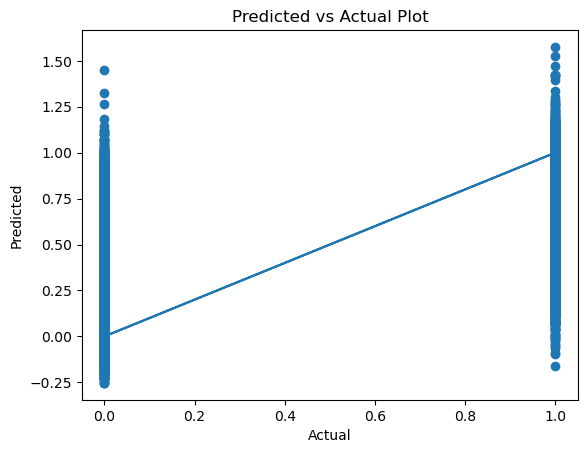

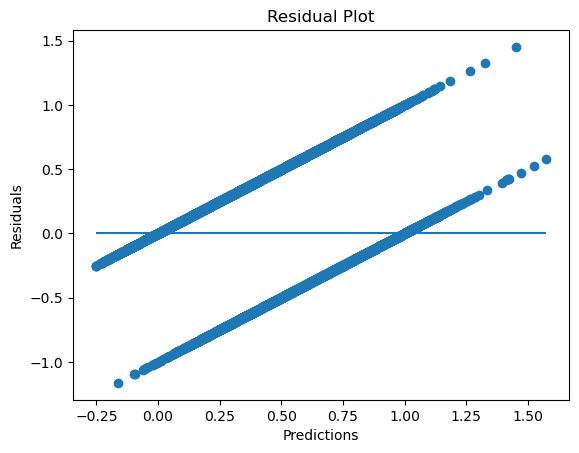

In [27]:
# Step 2: Init the Model
lr = LinearRegression()

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

In [28]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[19113  7397]
 [ 6148 20361]]
    
    AUC: 0.8190811191729379

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     26510
         1.0       0.73      0.77      0.75     26509

    accuracy                           0.74     53019
   macro avg       0.75      0.74      0.74     53019
weighted avg       0.75      0.74      0.74     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6365 2471]
 [2079 6758]]
    
    AUC: 0.8182194659958107

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8836
         1.0       0.73      0.76      0.75      8837

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673

    


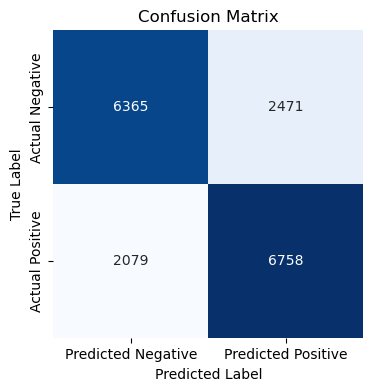

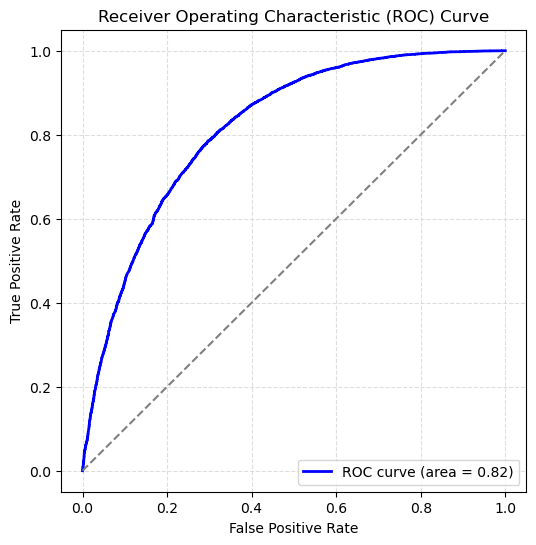

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[24944  1566]
 [ 2949 23560]]
    
    AUC: 0.9828378237100147

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     26510
         1.0       0.94      0.89      0.91     26509

    accuracy                           0.91     53019
   macro avg       0.92      0.91      0.91     53019
weighted avg       0.92      0.91      0.91     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6080 2756]
 [3164 5673]]
    
    AUC: 0.6781470626941858

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.66      0.69      0.67      8836
         1.0       0.67      0.64      0.66      8837

    accuracy                           0.67     17673
   macro avg       0.67      0.67      0.66     17673
weighted avg       0.67      0.67      0.66     17673

    


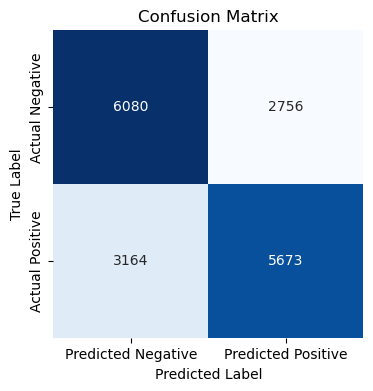

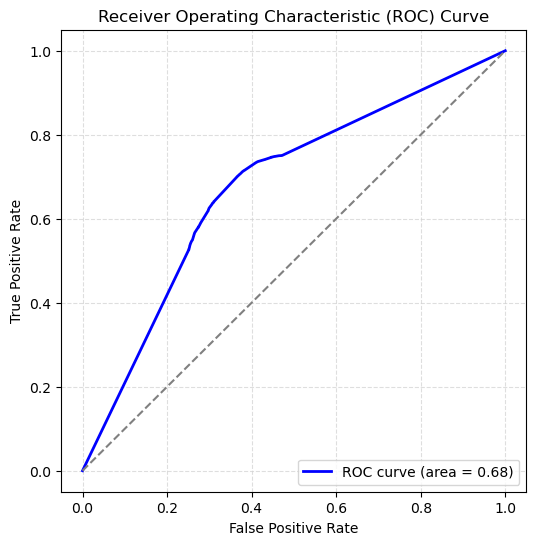

In [30]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[24086  2424]
 [ 2093 24416]]
    
    AUC: 0.9769879019757124

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     26510
         1.0       0.91      0.92      0.92     26509

    accuracy                           0.91     53019
   macro avg       0.91      0.91      0.91     53019
weighted avg       0.91      0.91      0.91     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6079 2757]
 [2375 6462]]
    
    AUC: 0.7749041759428199

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      8836
         1.0       0.70      0.73      0.72      8837

    accuracy                           0.71     17673
   macro avg       0.71      0.71      0.71     17673
weighted avg       0.71      0.71      0.71     17673

    


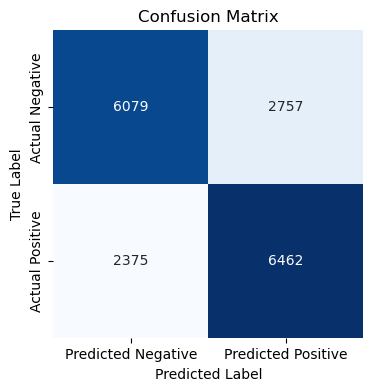

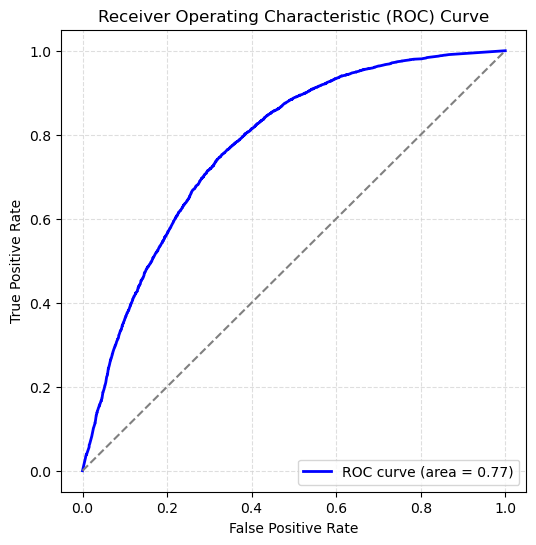

In [31]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18812  7698]
 [ 5176 21333]]
    
    AUC: 0.8409384112858107

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.78      0.71      0.75     26510
         1.0       0.73      0.80      0.77     26509

    accuracy                           0.76     53019
   macro avg       0.76      0.76      0.76     53019
weighted avg       0.76      0.76      0.76     53019

    
TEST METRICS
    Confusion Matrix: 
    [[5951 2885]
 [1998 6839]]
    
    AUC: 0.7892729627728348

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      8836
         1.0       0.70      0.77      0.74      8837

    accuracy                           0.72     17673
   macro avg       0.73      0.72      0.72     17673
weighted avg       0.73      0.72      0.72     17673

    


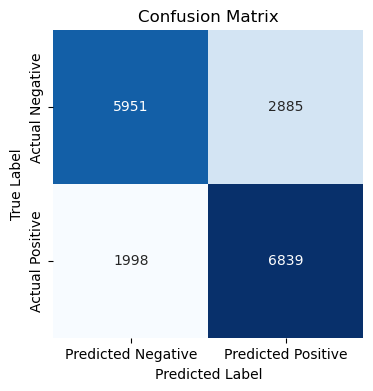

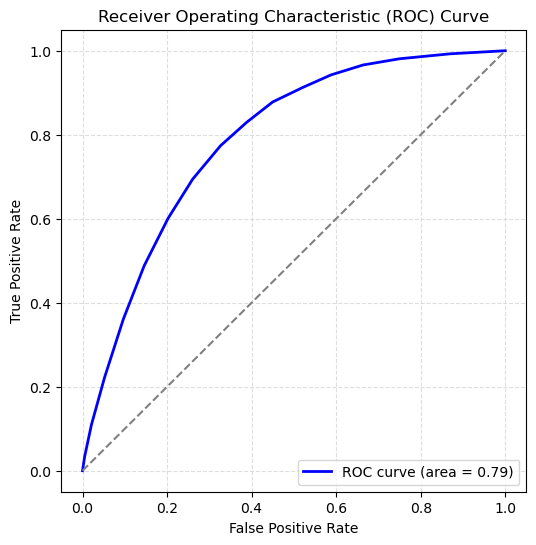

In [32]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[24944  1566]
 [ 2949 23560]]
    
    AUC: 0.9828378237100147

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     26510
         1.0       0.94      0.89      0.91     26509

    accuracy                           0.91     53019
   macro avg       0.92      0.91      0.91     53019
weighted avg       0.92      0.91      0.91     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6168 2668]
 [2711 6126]]
    
    AUC: 0.7472722295087023

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.69      0.70      0.70      8836
         1.0       0.70      0.69      0.69      8837

    accuracy                           0.70     17673
   macro avg       0.70      0.70      0.70     17673
weighted avg       0.70      0.70      0.70     17673

    


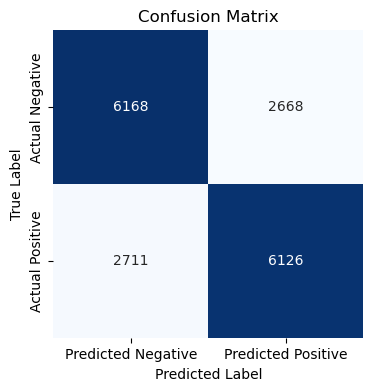

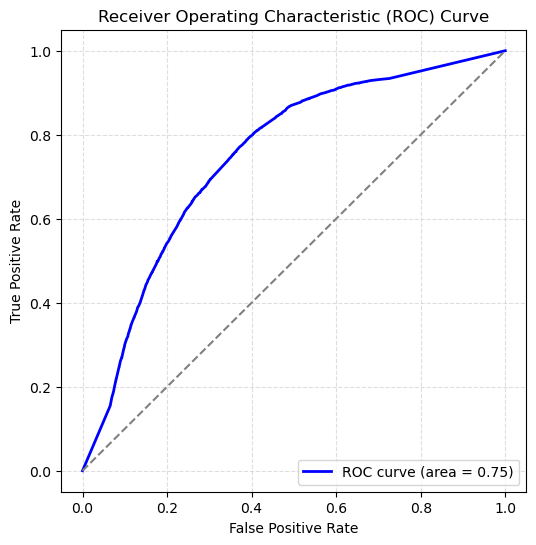

In [33]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[19082  7428]
 [ 6021 20488]]
    
    AUC: 0.8224556163419955

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     26510
         1.0       0.73      0.77      0.75     26509

    accuracy                           0.75     53019
   macro avg       0.75      0.75      0.75     53019
weighted avg       0.75      0.75      0.75     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6337 2499]
 [2061 6776]]
    
    AUC: 0.820453772624495

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8836
         1.0       0.73      0.77      0.75      8837

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673

    


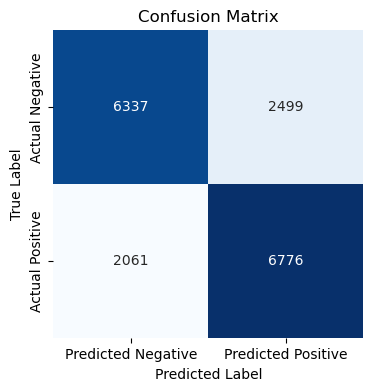

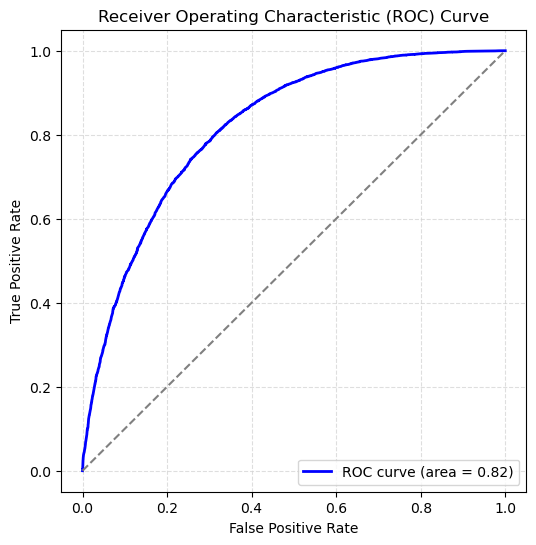

In [34]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18743  7767]
 [ 5446 21063]]
    
    AUC: 0.8282018680260317

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     26510
         1.0       0.73      0.79      0.76     26509

    accuracy                           0.75     53019
   macro avg       0.75      0.75      0.75     53019
weighted avg       0.75      0.75      0.75     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6186 2650]
 [1850 6987]]
    
    AUC: 0.8228197199898182

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8836
         1.0       0.73      0.79      0.76      8837

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.74     17673
weighted avg       0.75      0.75      0.74     17673

    


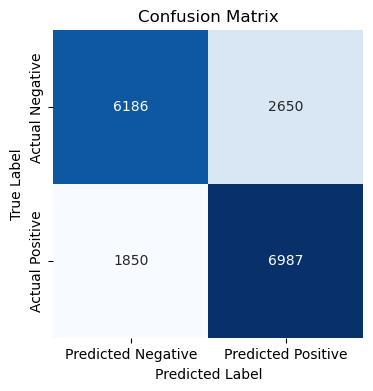

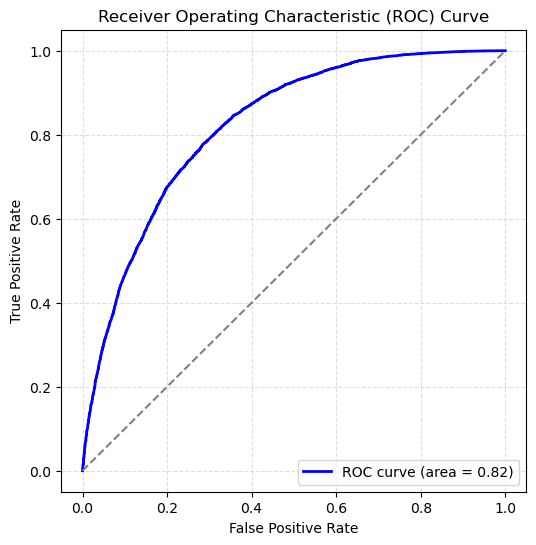

In [35]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [36]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[19201  7309]
 [ 4756 21753]]
    
    AUC: 0.8562916227863027

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     26510
         1.0       0.75      0.82      0.78     26509

    accuracy                           0.77     53019
   macro avg       0.77      0.77      0.77     53019
weighted avg       0.77      0.77      0.77     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6147 2689]
 [1848 6989]]
    
    AUC: 0.8180312897954212

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8836
         1.0       0.72      0.79      0.75      8837

    accuracy                           0.74     17673
   macro avg       0.75      0.74      0.74     17673
weighted avg       0.75      0.74      0.74     17673

    


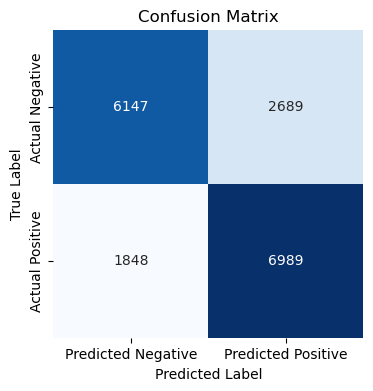

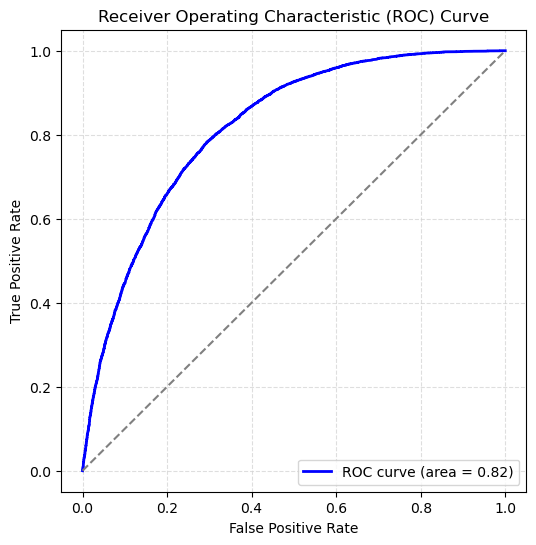

In [37]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18796  7714]
 [ 5136 21373]]
    
    AUC: 0.8381166327446297

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.79      0.71      0.75     26510
         1.0       0.73      0.81      0.77     26509

    accuracy                           0.76     53019
   macro avg       0.76      0.76      0.76     53019
weighted avg       0.76      0.76      0.76     53019

    
TEST METRICS
    Confusion Matrix: 
    [[6128 2708]
 [1819 7018]]
    
    AUC: 0.8224175875712498

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      8836
         1.0       0.72      0.79      0.76      8837

    accuracy                           0.74     17673
   macro avg       0.75      0.74      0.74     17673
weighted avg       0.75      0.74      0.74     17673

    


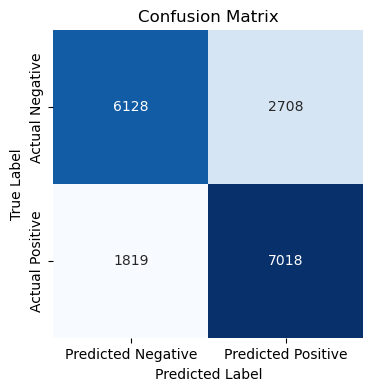

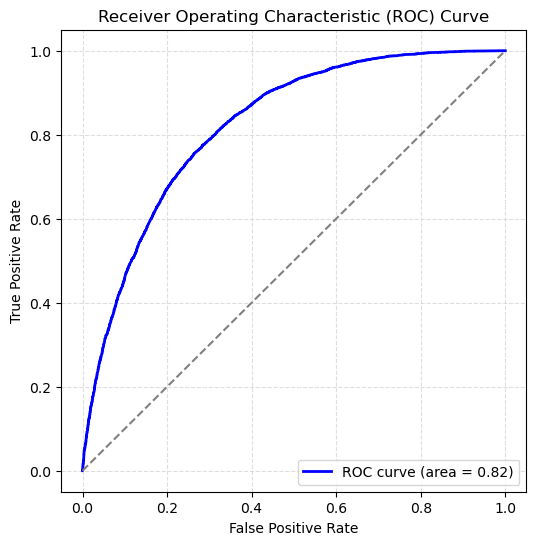

In [38]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [39]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Age,0.34
3,BMI,0.28
5,GenHlth,0.16
8,HighBP,0.08
6,MentHlth,0.06
2,HighChol,0.04
1,Sex,0.02
7,PhysHlth,0.02
4,Smoker,0.00


In [40]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
8,HighBP,0.464614
5,GenHlth,0.301467
2,HighChol,0.081715
0,Age,0.049350
3,BMI,0.035981
1,Sex,0.024492
4,Smoker,0.014318
7,PhysHlth,0.014290
6,MentHlth,0.013773


In [41]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
3,BMI,0.271000
0,Age,0.197000
5,GenHlth,0.126667
7,PhysHlth,0.121000
6,MentHlth,0.108667
2,HighChol,0.051667
1,Sex,0.049333
8,HighBP,0.038667
4,Smoker,0.036000


In [42]:
# Conclusion Ada is the best model.
# No signs of oveer/Under fitting
#Is tied with others for best auc score
# Deciding factor is that the feature importances make the most sense out of the others that cam close.

In [43]:
# Retrain the model on the ENTIRE dataset
ada = AdaBoostClassifier(random_state=42)
ada.fit(X, y)

AdaBoostClassifier(random_state=42)

In [44]:
# Save off my models
import pickle

# Model
pickle.dump(ada, open("diabetes.pkl", 'wb'))